In [1]:
import numpy as np
import xarray as xr
import os.path as op
from xhistogram.xarray import histogram as xhist
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ddir = '/store/CT1/hmg2840/lbrodeau/eNATL60/eNATL60-BLBT02-S/'
scratch = '/scratch/cnt0024/hmg2840/tuchida/temp'

In [3]:
g = 9.81
# alpha = 4e-5
# beta = 7.9e-4
Ce = 0.01
rho0 = 1e3
Cp = 4e3
ys,ye = (2000,2500)
xs,xe = (2300,3100)
zchunk = 4

dsmask = xr.open_dataset(op.join(ddir,'../eNATL60-I/mesh_mask_eNATL60_3.6.nc'), chunks={'z':zchunk})
At = (dsmask.e1t * dsmask.e2t)[0].sel(y=slice(ys,ye),x=slice(xs,xe))
Atb = At.coarsen({'y':5,'x':5}, boundary='trim').sum()

In [4]:
wsbs_10 = xr.open_mfdataset(op.join(scratch,'GulfStream/wsbs_bar-*.nc')).__xarray_dataarray_variable__.drop('time_centered')
BFK_10 = xr.open_mfdataset(op.join(scratch,'GulfStream/BFK_bar-*.nc')).__xarray_dataarray_variable__
wsTs_10 = xr.open_mfdataset(op.join(scratch,'GulfStream/wsTs_bar-*.nc')
                           ).sel(time_counter=slice('2010-01-01',None)).__xarray_dataarray_variable__.drop('time_centered')
wsSs_10 = xr.open_mfdataset(op.join(scratch,'GulfStream/wsSs_bar-*.nc')
                           ).sel(time_counter=slice('2010-01-01',None)).__xarray_dataarray_variable__.drop('time_centered')
BFKt_10 = xr.open_mfdataset(op.join(scratch,'GulfStream/BFKt_bar-*.nc')).__xarray_dataarray_variable__
BFKs_10 = xr.open_mfdataset(op.join(scratch,'GulfStream/BFKs_bar-*.nc')).__xarray_dataarray_variable__
# ds = xr.open_mfdataset(op.join(scratch,'GulfStream/BFKt-s_bar-*.nc'))
# BFKt_bar = ds.BFKt
# BFKs_bar = ds.BFKs

print(wsTs_10.time_counter, wsbs_10.time_counter)

/scratch/cnt0024/hmg2840/tuchida/condapack/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  """Entry point for launching an IPython kernel.
/scratch/cnt0024/hmg2840/tuchida/condapack/lib/python3.7/site-packages/xarray/backends/api.py:933: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,
/scratch/cnt0024/hmg2840/tuc

<xarray.DataArray 'time_counter' (time_counter: 125)>
array(['2010-01-01T23:30:00.000000000', '2010-01-02T23:30:00.000000000',
       '2010-01-03T23:30:00.000000000', '2010-01-04T23:30:00.000000000',
       '2010-01-05T23:30:00.000000000', '2010-01-06T23:30:00.000000000',
       '2010-01-07T23:30:00.000000000', '2010-01-08T23:30:00.000000000',
       '2010-01-09T23:30:00.000000000', '2010-01-10T23:30:00.000000000',
       '2010-01-11T23:30:00.000000000', '2010-01-12T23:30:00.000000000',
       '2010-01-13T23:30:00.000000000', '2010-01-14T23:30:00.000000000',
       '2010-01-15T23:30:00.000000000', '2010-01-16T23:30:00.000000000',
       '2010-01-17T23:30:00.000000000', '2010-01-18T23:30:00.000000000',
       '2010-01-19T23:30:00.000000000', '2010-01-20T23:30:00.000000000',
       '2010-01-21T23:30:00.000000000', '2010-01-22T23:30:00.000000000',
       '2010-01-23T23:30:00.000000000', '2010-01-24T23:30:00.000000000',
       '2010-01-25T23:30:00.000000000', '2010-01-26T23:30:00.000000000

/scratch/cnt0024/hmg2840/tuchida/condapack/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  
/scratch/cnt0024/hmg2840/tuchida/condapack/lib/python3.7/site-packages/xarray/backends/api.py:933: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,


In [5]:
MLD_bar = xr.open_mfdataset(op.join(scratch,'GulfStream/MLD_bar-*.nc')).__xarray_dataarray_variable__
alpha_b = xr.open_mfdataset(op.join(scratch,'GulfStream/rho_alpha_beta_bar*.nc')).alpha.drop('time_centered')
beta_b = xr.open_mfdataset(op.join(scratch,'GulfStream/rho_alpha_beta_bar*.nc')).beta.drop('time_centered')
alpha_b

/scratch/cnt0024/hmg2840/tuchida/condapack/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  """Entry point for launching an IPython kernel.
/scratch/cnt0024/hmg2840/tuchida/condapack/lib/python3.7/site-packages/xarray/backends/api.py:933: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,
/scratch/cnt0024/hmg2840/tuc

<xarray.DataArray 'alpha' (time_counter: 215, y: 100, x: 160)>
dask.array<concatenate, shape=(215, 100, 160), dtype=float64, chunksize=(25, 100, 160), chunktype=numpy.ndarray>
Coordinates:
    nav_lat       (y, x) float32 dask.array<chunksize=(100, 160), meta=np.ndarray>
    deptht        float32 0.48045477
    nav_lon       (y, x) float32 dask.array<chunksize=(100, 160), meta=np.ndarray>
  * time_counter  (time_counter) datetime64[ns] 2009-10-03T23:30:00 ... 2010-05-05T23:30:00
Dimensions without coordinates: y, x

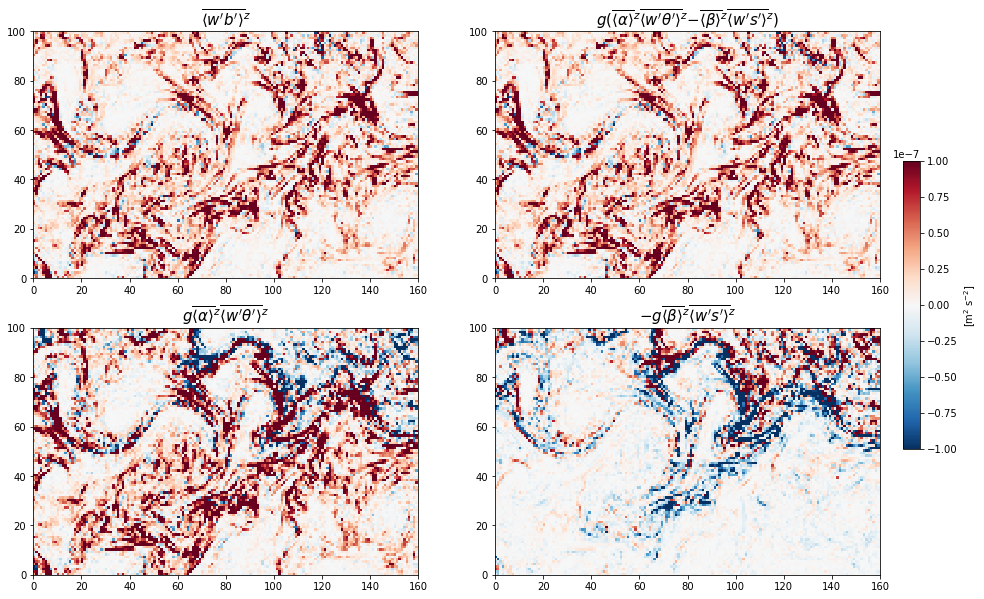

In [20]:
fig, axes = plt.subplots(figsize=(16,10), nrows=2, ncols=2)
# fig.set_tight_layout(True)

im = axes[0,0].pcolormesh(wsbs_10[0], vmax=1e-7, vmin=-1e-7, cmap='RdBu_r')
axes[0,1].pcolormesh((g*(alpha_b*wsTs_10 - beta_b*wsSs_10))[0], vmax=1e-7, vmin=-1e-7, cmap='RdBu_r')
axes[1,0].pcolormesh((g*alpha_b*wsTs_10)[0], vmax=1e-7, vmin=-1e-7, cmap='RdBu_r')
axes[1,1].pcolormesh((-g*beta_b*wsSs_10)[0], vmax=1e-7, vmin=-1e-7, cmap='RdBu_r')

axes[0,0].set_title(r"$\overline{\langle w'b'\rangle}^z$", fontsize=15)
axes[0,1].set_title(r"$g(\overline{\langle\alpha\rangle}^z \overline{\langle w'\theta'\rangle}^z$"
                    + r"$- \overline{\langle\beta\rangle}^z \overline{\langle w's'\rangle}^z)$", fontsize=15)
axes[1,0].set_title(r"$g\overline{\langle\alpha\rangle}^z \overline{\langle w'\theta'\rangle}^z$", fontsize=15)
axes[1,1].set_title(r"$- g\overline{\langle\beta\rangle}^z \overline{\langle w's'\rangle}^z$", fontsize=15)

fig.subplots_adjust(right=0.86)
# cbaxes = fig.add_axes([0.2, 0.08, 0.6, 0.01]) 
cbaxes = fig.add_axes([0.88, 0.3, 0.015, 0.4]) 
cbar = fig.colorbar(im, orientation='vertical', cax=cbaxes)
cbar.set_label(r"[m$^2$ s$^{-2}$]")

plt.savefig('/scratch/cnt0024/hmg2840/tuchida/Figs/wsbs-Ts-Ss_GulfStream_2010-01-01.pdf')

In [9]:
wsbs = ((wsbs_10[:]*Atb).sel(y=slice(1,-1),x=slice(1,-1)).sum(dim=['y','x']) 
        * Atb.sel(y=slice(1,-1),x=slice(1,-1)).sum(dim=['y','x'])**-1
       )
awsTs = ((g*alpha_b*wsTs_10[:]*Atb).sel(y=slice(1,-1),x=slice(1,-1)).sum(dim=['y','x']) 
        * Atb.sel(y=slice(1,-1),x=slice(1,-1)).sum(dim=['y','x'])**-1
       )
bwsSs = ((g*beta_b*wsSs_10[:]*Atb).sel(y=slice(1,-1),x=slice(1,-1)).sum(dim=['y','x']) 
        * Atb.sel(y=slice(1,-1),x=slice(1,-1)).sum(dim=['y','x'])**-1
       )
wsbs_lin = ((g*(alpha_b*wsTs_10-beta_b*wsSs_10)[:]*Atb).sel(y=slice(1,-1),x=slice(1,-1)).sum(dim=['y','x']) 
            * Atb.sel(y=slice(1,-1),x=slice(1,-1)).sum(dim=['y','x'])**-1
           )
wsbs_lin

<xarray.DataArray (time_counter: 125)>
dask.array<mul, shape=(125,), dtype=float64, chunksize=(25,), chunktype=numpy.ndarray>
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 2010-01-01T23:30:00 ... 2010-05-05T23:30:00

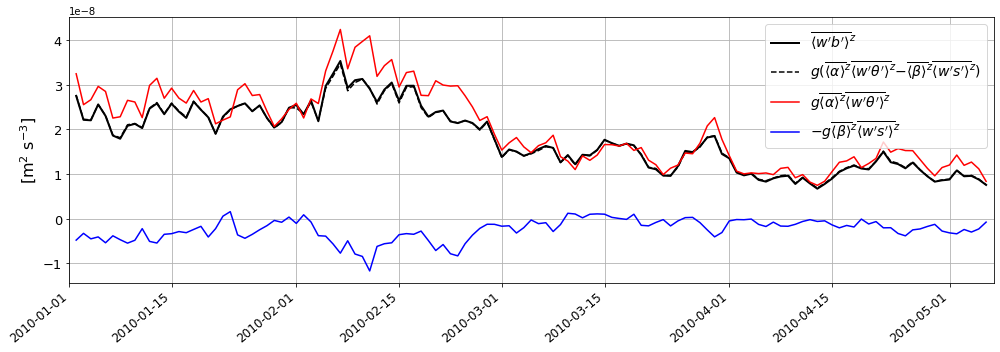

In [21]:
fig, ax1 = plt.subplots(figsize=(14,5))
fig.set_tight_layout(True)
# ax2 = ax1.twinx()
# ax3 = ax1.twinx()
# ax4 = ax1.twinx()
# ax5 = ax.twinx()
# ax6 = ax5.twinx()

# ax3.spines['left'].set_position(('axes',-0.058))
# ax4.spines['left'].set_position(('axes',-0.12))
# ax5.spines['right'].set_position(('axes',1.068))
# ax6.spines['right'].set_position(('axes',1.138))


wsbs.sel(time_counter=slice(None,None)).plot(ax=ax1, color='k', lw=2,
                                            label=r"$\overline{\langle w'b'\rangle}^z$")
wsbs_lin.sel(time_counter=slice(None,None)).plot(ax=ax1, color='k', ls='--',
                                label=r"$g(\overline{\langle\alpha\rangle}^z \overline{\langle w'\theta'\rangle}^z$"
                                      + r"$- \overline{\langle\beta\rangle}^z \overline{\langle w's'\rangle}^z)$")
awsTs.sel(time_counter=slice('2010-01-01',None)).plot(ax=ax1, color='r', 
                                                     label=r"$g\overline{\langle\alpha\rangle}^z \overline{\langle w'\theta'\rangle}^z$")
(-bwsSs).sel(time_counter=slice('2010-01-01',None)).plot(ax=ax1, color='b',
                                                     label=r"$-g\overline{\langle\beta\rangle}^z \overline{\langle w's'\rangle}^z$")



ax1.set_ylabel(r"[m$^2$ s$^{-3}$]", fontsize=16)
# ax2.set_ylabel(r"$\overline{\langle w'\theta'\rangle}^z, \overline{\langle w's'\rangle}^z$ [m$^2$ s$^{-3}$]", fontsize=16)
ax1.set_xlabel(r"")


ax1.set_xlim(['2010-01-01','2010-05-07'])
# ax1.set_xticklabels([])
ax1.tick_params(axis='x', labelsize=12, labelrotation=40)
# ax1.set_xlim(['2009-08-01','2010-05-10'])
ax1.tick_params(axis='y', labelsize=13)
# ax2.spines['right'].set_color('k')
# ax2.tick_params(axis='y', colors='k', labelsize=13)

ax1.legend(loc='upper right', fontsize=14)
# ax2.legend(loc='upper right', fontsize=14)
ax1.grid(True)


plt.savefig('/scratch/cnt0024/hmg2840/tuchida/Figs/wsbs_tot_lin_GulfStream_2010-01-01_2010-05-05.pdf')